In [ ]:
# This file is part of the scikit-learn project.
from sklearn.datasets  import load_breast_cancer

In [ ]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [ ]:
# Load the breast cancer dataset
# The dataset is available in the sklearn.datasets module
breast = load_breast_cancer()

In [ ]:
# Extract the features and target variable
data = breast.data
target = breast.target

In [ ]:
# Create a DataFrame for better visualization
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# 
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [ ]:
# # concatenate the features and target variable
data = np.concatenate([data, target.reshape(-1, 1)], axis=1)

In [ ]:
# add column nameed label to the DataFrame
columns = breast.feature_names
columns = np.append(columns, 'label')
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'], dtype='<U23')

In [17]:
# df = pd.DataFrame(data, columns=columns)
df = pd.DataFrame(data)
df.columns = columns
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<Axes: title={'center': 'Breast Cancer Dataset Label Distribution'}, xlabel='label'>

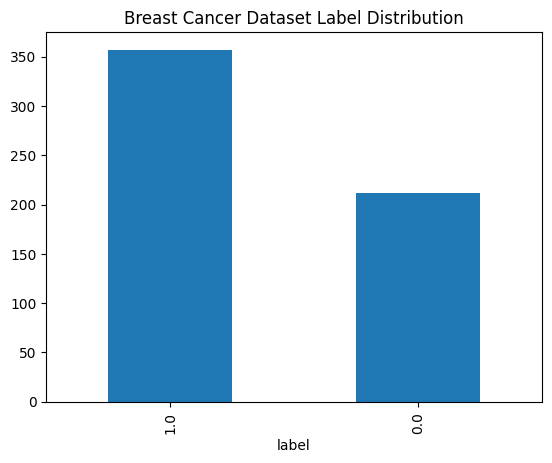

In [ ]:
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', title='Breast Cancer Dataset Label Distribution')

In [20]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Replace the target variable values with meaningful names
df['label'].replace(0, 'malignant', inplace=True)
df['label'].replace(1, 'benign', inplace=True)

In [23]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.066380,0.1798,0.05391,0.7474,1.0160,5.029,79.25,0.010820,0.02203,0.03500,0.018090,0.015500,0.001948,19.77,24.56,128.80,1223.0,0.1500,0.20450,0.28290,0.15200,0.2650,0.06387,malignant
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.010390,0.013690,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368,malignant
299,10.510,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.018750,0.1695,0.06556,0.2868,1.1430,2.289,20.56,0.010170,0.01443,0.01861,0.012500,0.034640,0.001971,10.93,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777,benign
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.015040,0.1717,0.06899,0.2351,2.0110,1.660,14.20,0.010520,0.01755,0.01714,0.009333,0.022790,0.004237,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211,benign
259,15.530,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.083990,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.02556,0.02889,0.010220,0.009947,0.003359,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.57030,0.20140,0.3512,0.12040,malignant
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,2.275,20.98,0.010980,0.01257,0.01031,0.003934,0.026930,0.002979,11.15,24.62,71.11,380.2,0.1388,0.12550,0.06409,0.02500,0.3057,0.07875,benign
468,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.100200,0.1696,0.07369,0.9289,1.4650,5.801,104.90,0.006766,0.07025,0.06591,0.023110,0.016730,0.011300,21.57,28.87,143.60,1437.0,0.1207,0.47850,0.51650,0.19960,0.2301,0.12240,malignant
389,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.102100,0.1989,0.05884,0.6107,2.8360,5.383,70.10,0.011240,0.04097,0.07469,0.034410,0.027680,0.006240,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.38290,0.18250,0.2576,0.07602,malignant
384,13.280,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.028640,0.1617,0.05594,0.1833,0.5308,1.592,15.26,0.004271,0.02073,0.02828,0.008468,0.014610,0.002613,14.24,17.37,96.59,623.7,0.1166,0.26850,0.28660,0.09173,0.2736,0.07320,benign
209,15.270,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.031570,0.1359,0.05526,0.2134,0.3628,1.525,20.00,0.004291,0.01236,0.01841,0.007373,0.009539,0.001656,17.38,15.92,113.70,932.7,0.1222,0.21860,0.29620,0.10350,0.2320,0.07474,benign


In [ ]:
# import the standard scaler to scale the features
from sklearn.preprocessing import StandardScaler

In [27]:
# Split the dataset into features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Scale the features
X_scaled = StandardScaler().fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
np.mean(X), np.std(X)

(np.float64(61.89071233951961), np.float64(228.29740508276657))

In [30]:
np.mean(X_scaled), np.std(X_scaled)

(np.float64(-6.826538293184326e-17), np.float64(1.0))

In [31]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [ ]:
# Create a new DataFrame with the scaled features and the target variable
scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
scaled_df['label'] = y
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,malignant


In [33]:
from sklearn.decomposition import PCA

In [ ]:
# Perform PCA to reduce the dimensionality of the dataset
# We will reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
breast_pca = pca.fit_transform(X_scaled)
breast_pca.shape

(569, 2)

In [ ]:
# Create a DataFrame for the PCA results
breast_pca_df = pd.DataFrame(breast_pca, columns=['PC1', 'PC2'])
breast_pca_df['label'] = y

,PC1,PC2,label
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant


In [40]:
breast_pca_df.sample(10)

,PC1,PC2,label
184,-0.390019,-0.989242,malignant
144,-4.346490,-0.893572,benign
538,-4.197080,2.367392,benign
233,3.316324,-3.939152,malignant
470,-2.683846,1.443556,benign
329,2.107801,1.121974,malignant
138,3.782026,0.860382,malignant
114,-2.510118,3.251320,benign
460,3.475494,-1.672884,malignant
317,1.895316,-2.392238,malignant


In [ ]:
# show the PCA components
pca.n_components

2

In [41]:
# explained variance ratio for each component
print(f'explained variance ratio for each component = {pca.explained_variance_ratio_}')

explained variance ratio for each component = [0.44272026 0.18971182]


In [42]:
# total explained variance ratio
print(f' total explained variance ratio = {pca.explained_variance_ratio_.sum()}')

 total explained variance ratio = 0.6324320765155943


In [43]:
pc1_df = breast_pca_df[breast_pca_df['label'] == 'malignant']
pc2_df = breast_pca_df[breast_pca_df['label'] == 'benign']

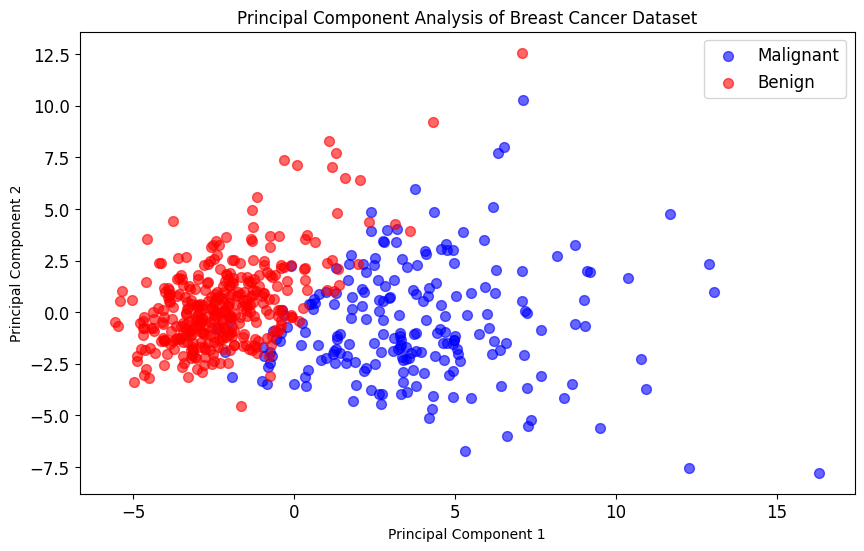

In [ ]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.title('Principal Component Analysis of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the points for each class
for color, label in zip(['blue', 'red'], [ 'Malignant', 'Benign']):
    subset = breast_pca_df[breast_pca_df['label'] == label.lower()]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=label, s=50, alpha=0.6)

plt.legend(['Malignant', 'Benign'], loc='upper right', fontsize=12)
plt.show()